# Class Notebook - September 27, 2021
### Jake Postiglione

## Basics of parameter estimation

* In Physics we like to measure things.
* Sometimes the things that we want to measure are directly measurable, for example the width of a room.
* Some other times the measurements are nto direct but come from a model. This process is called *inference*.
* Say, for example, that you have a scatter plot with some points that show your measurements (practical example:
  time in seconds and distance in meters).
* In this case, the data seems to suggest that a simple model, a straight line, could "fit" your data.
* To "fit" the data means that you would be able to draw a model that goes through the data reasonably well, and allows
  you to predict what happens in regions not covered by the points.
* For this simple case, you would draw a line through your points, and you can find (for example) the slope and intercept of this line.
* The SLOPE and INTERCEPT are not measured directly, but they are *inferred* from your measurements + your model.
* Those are the parameters of your model.

## The X^2 function

* In real life, data have uncertainties associated to them. We often call them sigma_i (i means its associated to the i-th data point).
* A good thing to do is to take into account the uncertainties when we fit models to data.
* Data points with larger uncertainties should matter less. THis is called inverse error weighting. We do this by modifying the loss function:

![Loss Function](https://latex.codecogs.com/png.latex?%5Cchi%5E2%3D%5Csum%5En_%7Bi%3D1%7D%28Data_i%20-%20Model_i%28par1%2C%20par2%2C%20...%29%29%5E2%20/%20%5Csigma%5E2_i)

## Parameter Fitting

* The previous fits to straight lines were done by Python using algorithms that do things in the background.
* If we want to fit the line ourselves (finding the parameters "slope", "intercept"), what should we do?
* We can make a grid of all possible parameter values.
* Each (slope, intercept) pair corresponds to a *unique* straight line.
* THe straight line that minimizes the difference between model and ata, while inverse-weighing the errors in the winning model (best fit).
* So we'll go through all the possible combinations of (slope, intercept) pairs and find the one that minimizes the difference.

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize = 14)
matplotlib.rc('ytick', labelsize = 14)

In [18]:
np.random.seed(16) # Fixing the seed.

x = np.arange(10)

y = 2*x + 5 + np.random.randn(10) # Generate some data with random gaussian scatter.

Text(0, 0.5, 'distance (m)')

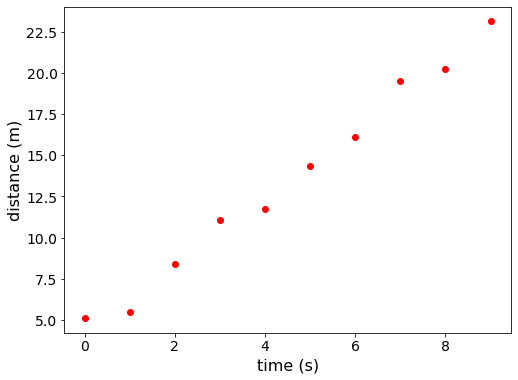

In [21]:
plt.figure(figsize = (8,6))
plt.scatter(x, y, c = 'red')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')

In [24]:
y = np.round(y, 1)
print(y) # All the points

[ 5.1  5.5  8.4 11.1 11.8 14.4 16.1 19.5 20.2 23.1]


In [28]:
slopes = np.linspace(1, 3, 101) # Cheating by passing in 101 to get nice numbers to work with

intercepts = np.linspace(4, 6, 101)

**Note: These are already > 10000 models (curse of dimensionality!)**
For convenience, we can define two functions that describe our model (a straight line) and the squared error function:

In [29]:
def model(x, m, b):
    return m * x + b

def se(m, b, x, yObserved):
    return np.sum((yObserved - model(x, m, b))**2)

We can calculate the squared error for each value:

In [30]:
squareErrors = np.array([[se(m, b, x, y) for b in intercepts] for m in slopes])

# This generates an array where first index refers to slope and second index refers to intercept.

In [36]:
indices = np.unravel_index(squareErrors.argmin(), squareErrors.shape)

print(indices)

(52, 17)


In [38]:
bestM, bestB = slopes[indices[0]], intercepts[indices[1]]

bestM, bestB # How do they compare to the original?

(2.04, 4.34)

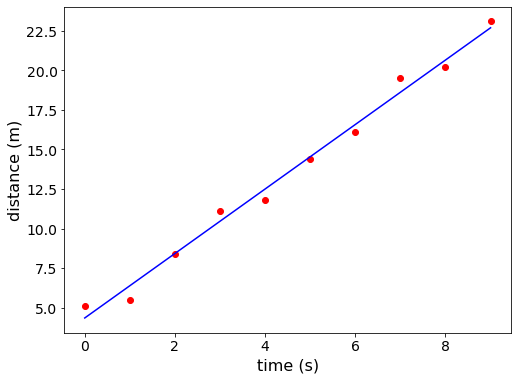

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, c = 'red')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.plot(x, bestM * x + bestB, c = 'blue') # Plot the best fit model
